In this segment, the necessary libraries are imported. cv2 is the OpenCV library for image processing, numpy is used for numerical operations, and matplotlib.pyplot is used for visualizations.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


This segment defines the path to the road image file and reads the image using cv2.imread().

In [ ]:
image_path = 'RoadCrackreal.png'  
image = cv2.imread(image_path)


Here, the image is preprocessed by converting it to grayscale using cv2.cvtColor() with the cv2.COLOR_BGR2GRAY flag. Then, a Gaussian blur is applied to the grayscale image using cv2.GaussianBlur() to reduce noise. The (5, 5) parameter specifies the kernel size, and 0 indicates that the standard deviation is calculated automatically.

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)


This segment applies the Canny edge detection algorithm to the blurred image using cv2.Canny(). The threshold1 and threshold2 parameters control the intensity gradient thresholds for edge detection.

In [ ]:
edges = cv2.Canny(blurred, threshold1=30, threshold2=100)


Here, an overlay image is created by making a copy of the original image using np.copy(). The pixels corresponding to the detected edges (non-zero values) in the edges image are set to green ([0, 255, 0]) in the overlay image. This creates a visual representation of the edges.

In [ ]:
overlay = np.copy(image)
overlay[edges != 0] = [0, 255, 0]


In this segment, a blended image is created by combining the original image and the overlay image using cv2.addWeighted(). The alpha parameter controls the intensity of the overlay. Adjusting its value can change the transparency of the overlay.

In [ ]:
alpha = 0.6
blended = cv2.addWeighted(image, 1 - alpha, overlay, alpha, 0)


In the final segment, a figure with two subplots is created using plt.subplots(). The original image is displayed in the first subplot, while the blended image with the overlayed edges is displayed in the second subplot. Titles are added to the subplots using set_title(), and the axes are turned off using axis('off'). plt.subplots_adjust() is used to adjust the spacing between the subplots. Finally, plt.show() is called to display the figure.

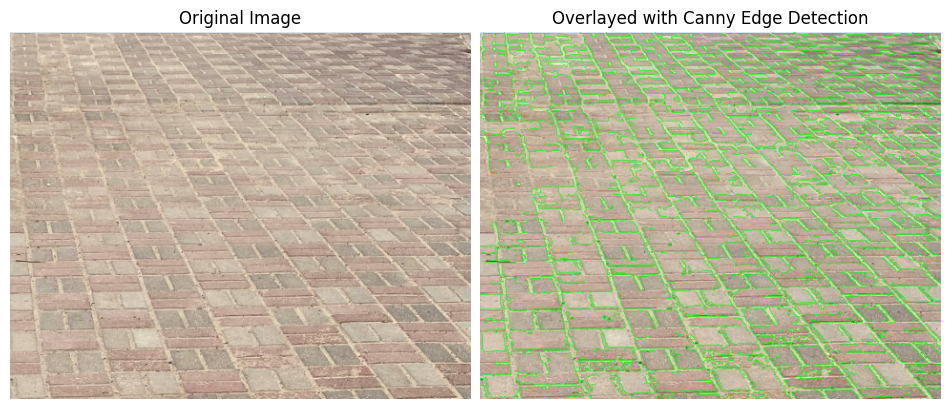

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(blended, cv2.COLOR_BGR2RGB))
axes[1].set_title("Overlayed with Canny Edge Detection")
axes[1].axis('off')

plt.subplots_adjust(wspace=0.02)
plt.show()
